In [1]:
%load_ext autoreload
%autoreload 2 

## Modules & Libraries

In [2]:
import os
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision.transforms as T

## Dataset Instance & Specifications

In [3]:
from data import *

In [4]:
mode = 'train'
path = os.path.join(os.getcwd(), 'dataset')
contrast = T.Lambda(lambda x: T.functional.adjust_contrast(x, contrast_factor=2))
sharpness  = T.Lambda(lambda x: T.functional.adjust_sharpness(x, sharpness_factor=2))
transforms = T.Compose([T.ToTensor()])

In [5]:
data = DigitMnistDataset(mode=mode, path=path, transforms=transforms)

## Labels Histogram

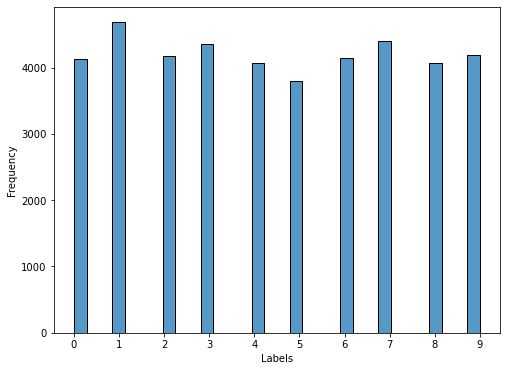

In [6]:
data.plot_label_distribution()

## Plot of Sample Images

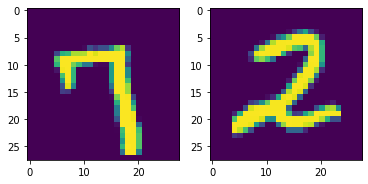

In [7]:
data.display_sample_images()

## Test Dataset Instance & Specifications


In [8]:
mode = 'test'

In [9]:
test_data = DigitMnistDataset(mode=mode, path=path, transforms=transforms)

## Plot of Sample Images from the Test Dataset

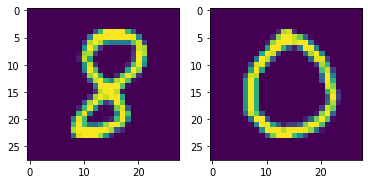

In [10]:
test_data.display_sample_images()

## Split into Training & Validation Data

In [11]:
from torch.utils.data import random_split

In [12]:
num_samples = len(data)
split_ratio = 0.6
num_train = int(num_samples * split_ratio)
num_val = num_samples - num_train

In [13]:
train_data, val_data = random_split(data, [num_train, num_val])

## Data Loaders

In [14]:
from torch.utils.data import DataLoader

In [15]:
train_loader = DataLoader(train_data, batch_size = 512, shuffle=True, num_workers=4, collate_fn=None,pin_memory=True)

In [16]:
validation_loader = DataLoader(val_data, batch_size = 512, shuffle=True, num_workers=4, collate_fn=None,pin_memory=True)

In [17]:
test_loader = DataLoader(test_data, batch_size = 512, shuffle=False, num_workers=4, collate_fn=None,pin_memory=True)

## Model instance & Specifications

In [18]:
from model import DigitRecognizer

In [19]:
in_channels = 1
num_classes = 10
bias =True

In [20]:
model = DigitRecognizer(in_channels=in_channels, num_classes=num_classes, bias=bias)

## Training Specifications

In [21]:
learning_rate = 1e-2
weight_decay = 1e-2
momentum = 0.9
epochs=45

## Optimizer

In [22]:
from torch.optim import Adam, SGD

In [23]:
optimizer = SGD(model.parameters(), lr=learning_rate, weight_decay=weight_decay, momentum=momentum)

## Learning Rate Scheduler

In [24]:
from torch.optim.lr_scheduler import StepLR

In [25]:
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

## Loss Function

In [26]:
from torch.nn import CrossEntropyLoss

In [27]:
criterion = CrossEntropyLoss(weight=None)


In [28]:
torch.backends.cudnn.benchmark = True

## Cuda Device

In [29]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [30]:
print(device)

cuda


## Training Loop

In [31]:
from train import *

In [32]:
total_loss, epoch_times, accuracies_train, accuracies_validation = train(model, optimizer, train_loader, validation_loader, criterion, epochs,scheduler=scheduler, device=device)

Current device: cuda


100%|██████████| 50/50 [00:31<00:00,  1.60it/s]

Evaluating epoch...


Epoch: 0 | Loss: 22.63 | Train acc: 86.36 | Val acc: 94.43 | Val_loss: 6.363460570573807 | lr: 0.01 | Runtime: 52.06 seconds


100%|██████████| 50/50 [00:23<00:00,  2.12it/s]

Evaluating epoch...


Epoch: 1 | Loss: 6.79 | Train acc: 95.97 | Val acc: 95.88 | Val_loss: 4.571164518594742 | lr: 0.01 | Runtime: 44.66 seconds


100%|██████████| 50/50 [00:24<00:00,  2.07it/s]

Evaluating epoch...


Epoch: 2 | Loss: 4.35 | Train acc: 97.58 | Val acc: 97.41 | Val_loss: 3.093486048281193 | lr: 0.01 | Runtime: 45.67 seconds


100%|██████████| 50/50 [00:24<00:00,  2.01it/s]

Evaluating epoch...


Epoch: 3 | Loss: 3.29 | Train acc: 98.31 | Val acc: 97.64 | Val_loss: 2.731921508908272 | lr: 0.01 | Runtime: 46.22 seconds


100%|██████████| 50/50 [00:25<00:00,  1.94it/s]

Evaluating epoch...


Epoch: 4 | Loss: 2.67 | Train acc: 98.67 | Val acc: 97.98 | Val_loss: 2.3999416828155518 | lr: 0.01 | Runtime: 50.55 seconds


100%|██████████| 50/50 [00:23<00:00,  2.11it/s]

Evaluating epoch...


Epoch: 5 | Loss: 2.23 | Train acc: 99.08 | Val acc: 98.04 | Val_loss: 2.3457465060055256 | lr: 0.01 | Runtime: 45.56 seconds


100%|██████████| 50/50 [00:23<00:00,  2.11it/s]

Evaluating epoch...


Epoch: 6 | Loss: 2.07 | Train acc: 99.13 | Val acc: 97.83 | Val_loss: 2.5108169354498386 | lr: 0.01 | Runtime: 45.22 seconds


100%|██████████| 50/50 [00:23<00:00,  2.11it/s]

Evaluating epoch...


Epoch: 7 | Loss: 1.89 | Train acc: 99.37 | Val acc: 98.13 | Val_loss: 2.1715409122407436 | lr: 0.01 | Runtime: 48.46 seconds


100%|██████████| 50/50 [00:24<00:00,  2.06it/s]

Evaluating epoch...


Epoch: 8 | Loss: 1.78 | Train acc: 99.45 | Val acc: 98.18 | Val_loss: 2.193288914859295 | lr: 0.01 | Runtime: 47.56 seconds


100%|██████████| 50/50 [00:25<00:00,  2.00it/s]

Evaluating epoch...


Epoch: 9 | Loss: 1.66 | Train acc: 99.54 | Val acc: 98.32 | Val_loss: 2.0627469457685947 | lr: 0.001 | Runtime: 48.61 seconds


100%|██████████| 50/50 [00:25<00:00,  1.93it/s]

Evaluating epoch...


Epoch: 10 | Loss: 1.38 | Train acc: 99.74 | Val acc: 98.36 | Val_loss: 1.983116328716278 | lr: 0.001 | Runtime: 47.50 seconds


100%|██████████| 50/50 [00:23<00:00,  2.15it/s]

Evaluating epoch...


Epoch: 11 | Loss: 1.33 | Train acc: 99.78 | Val acc: 98.38 | Val_loss: 1.9843241162598133 | lr: 0.001 | Runtime: 45.73 seconds


100%|██████████| 50/50 [00:23<00:00,  2.15it/s]

Evaluating epoch...


Epoch: 12 | Loss: 1.33 | Train acc: 99.77 | Val acc: 98.35 | Val_loss: 1.9821744188666344 | lr: 0.001 | Runtime: 46.89 seconds


100%|██████████| 50/50 [00:24<00:00,  2.06it/s]

Evaluating epoch...


Epoch: 13 | Loss: 1.32 | Train acc: 99.78 | Val acc: 98.34 | Val_loss: 1.988754753023386 | lr: 0.001 | Runtime: 45.44 seconds


100%|██████████| 50/50 [00:23<00:00,  2.12it/s]

Evaluating epoch...


Epoch: 14 | Loss: 1.31 | Train acc: 99.77 | Val acc: 98.32 | Val_loss: 1.9908417873084545 | lr: 0.001 | Runtime: 45.80 seconds


100%|██████████| 50/50 [00:23<00:00,  2.11it/s]

Evaluating epoch...


Epoch: 15 | Loss: 1.30 | Train acc: 99.78 | Val acc: 98.36 | Val_loss: 1.9775011166930199 | lr: 0.001 | Runtime: 44.97 seconds


100%|██████████| 50/50 [00:24<00:00,  2.06it/s]

Evaluating epoch...


Epoch: 16 | Loss: 1.32 | Train acc: 99.79 | Val acc: 98.35 | Val_loss: 1.9769460521638393 | lr: 0.001 | Runtime: 45.27 seconds


100%|██████████| 50/50 [00:23<00:00,  2.11it/s]

Evaluating epoch...


Epoch: 17 | Loss: 1.30 | Train acc: 99.79 | Val acc: 98.34 | Val_loss: 1.9864388331770897 | lr: 0.001 | Runtime: 44.77 seconds


100%|██████████| 50/50 [00:24<00:00,  2.05it/s]

Evaluating epoch...


Epoch: 18 | Loss: 1.29 | Train acc: 99.80 | Val acc: 98.35 | Val_loss: 1.980189312249422 | lr: 0.001 | Runtime: 46.22 seconds


100%|██████████| 50/50 [00:25<00:00,  2.00it/s]

Evaluating epoch...


Epoch: 19 | Loss: 1.29 | Train acc: 99.80 | Val acc: 98.35 | Val_loss: 1.9848699010908604 | lr: 0.0001 | Runtime: 46.19 seconds


100%|██████████| 50/50 [00:23<00:00,  2.10it/s]

Evaluating epoch...


Epoch: 20 | Loss: 1.29 | Train acc: 99.81 | Val acc: 98.32 | Val_loss: 1.9735975600779057 | lr: 0.0001 | Runtime: 44.87 seconds


100%|██████████| 50/50 [00:24<00:00,  2.08it/s]

Evaluating epoch...


Epoch: 21 | Loss: 1.28 | Train acc: 99.81 | Val acc: 98.33 | Val_loss: 1.9765832126140594 | lr: 0.0001 | Runtime: 44.68 seconds


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]

Evaluating epoch...


Epoch: 22 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.34 | Val_loss: 1.9742760267108679 | lr: 0.0001 | Runtime: 44.62 seconds


100%|██████████| 50/50 [00:23<00:00,  2.10it/s]

Evaluating epoch...


Epoch: 23 | Loss: 1.28 | Train acc: 99.81 | Val acc: 98.33 | Val_loss: 1.9745431430637836 | lr: 0.0001 | Runtime: 45.21 seconds


100%|██████████| 50/50 [00:23<00:00,  2.09it/s]

Evaluating epoch...


Epoch: 24 | Loss: 1.28 | Train acc: 99.81 | Val acc: 98.34 | Val_loss: 1.9779994152486324 | lr: 0.0001 | Runtime: 45.61 seconds


100%|██████████| 50/50 [00:24<00:00,  2.08it/s]

Evaluating epoch...


Epoch: 25 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.34 | Val_loss: 1.9766177833080292 | lr: 0.0001 | Runtime: 45.30 seconds


100%|██████████| 50/50 [00:23<00:00,  2.13it/s]

Evaluating epoch...


Epoch: 26 | Loss: 1.28 | Train acc: 99.81 | Val acc: 98.33 | Val_loss: 1.975343707948923 | lr: 0.0001 | Runtime: 44.53 seconds


100%|██████████| 50/50 [00:23<00:00,  2.17it/s]

Evaluating epoch...


Epoch: 27 | Loss: 1.27 | Train acc: 99.80 | Val acc: 98.34 | Val_loss: 1.9704806730151176 | lr: 0.0001 | Runtime: 43.85 seconds


100%|██████████| 50/50 [00:24<00:00,  2.07it/s]

Evaluating epoch...


Epoch: 28 | Loss: 1.31 | Train acc: 99.81 | Val acc: 98.34 | Val_loss: 1.9783317558467388 | lr: 0.0001 | Runtime: 45.32 seconds


100%|██████████| 50/50 [00:23<00:00,  2.09it/s]

Evaluating epoch...


Epoch: 29 | Loss: 1.28 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9769973754882812 | lr: 1e-05 | Runtime: 44.78 seconds


100%|██████████| 50/50 [00:23<00:00,  2.11it/s]

Evaluating epoch...


Epoch: 30 | Loss: 1.28 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9777003079652786 | lr: 1e-05 | Runtime: 44.96 seconds


100%|██████████| 50/50 [00:23<00:00,  2.10it/s]

Evaluating epoch...


Epoch: 31 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9726382829248905 | lr: 1e-05 | Runtime: 45.24 seconds


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]

Evaluating epoch...


Epoch: 32 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.34 | Val_loss: 1.975070271641016 | lr: 1e-05 | Runtime: 44.41 seconds


100%|██████████| 50/50 [00:24<00:00,  2.06it/s]

Evaluating epoch...


Epoch: 33 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.34 | Val_loss: 1.9698047935962677 | lr: 1e-05 | Runtime: 45.91 seconds


100%|██████████| 50/50 [00:23<00:00,  2.10it/s]

Evaluating epoch...


Epoch: 34 | Loss: 1.26 | Train acc: 99.81 | Val acc: 98.34 | Val_loss: 1.9723711758852005 | lr: 1e-05 | Runtime: 44.45 seconds


100%|██████████| 50/50 [00:23<00:00,  2.14it/s]

Evaluating epoch...


Epoch: 35 | Loss: 1.26 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9745209366083145 | lr: 1e-05 | Runtime: 44.72 seconds


100%|██████████| 50/50 [00:22<00:00,  2.18it/s]

Evaluating epoch...


Epoch: 36 | Loss: 1.26 | Train acc: 99.81 | Val acc: 98.34 | Val_loss: 1.9737834483385086 | lr: 1e-05 | Runtime: 43.95 seconds


100%|██████████| 50/50 [00:23<00:00,  2.13it/s]

Evaluating epoch...


Epoch: 37 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.34 | Val_loss: 1.9756931774318218 | lr: 1e-05 | Runtime: 45.07 seconds


100%|██████████| 50/50 [00:23<00:00,  2.11it/s]

Evaluating epoch...


Epoch: 38 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9717220142483711 | lr: 1e-05 | Runtime: 44.76 seconds


100%|██████████| 50/50 [00:23<00:00,  2.12it/s]

Evaluating epoch...


Epoch: 39 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.972022384405136 | lr: 1.0000000000000002e-06 | Runtime: 44.76 seconds


100%|██████████| 50/50 [00:23<00:00,  2.12it/s]

Evaluating epoch...


Epoch: 40 | Loss: 1.28 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9771879650652409 | lr: 1.0000000000000002e-06 | Runtime: 44.54 seconds


100%|██████████| 50/50 [00:24<00:00,  2.06it/s]

Evaluating epoch...


Epoch: 41 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9831067882478237 | lr: 1.0000000000000002e-06 | Runtime: 45.44 seconds


100%|██████████| 50/50 [00:24<00:00,  2.08it/s]

Evaluating epoch...


Epoch: 42 | Loss: 1.28 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9757155291736126 | lr: 1.0000000000000002e-06 | Runtime: 45.12 seconds


100%|██████████| 50/50 [00:24<00:00,  2.00it/s]

Evaluating epoch...


Epoch: 43 | Loss: 1.27 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9712116904556751 | lr: 1.0000000000000002e-06 | Runtime: 46.02 seconds


100%|██████████| 50/50 [00:23<00:00,  2.15it/s]

Evaluating epoch...


Epoch: 44 | Loss: 1.26 | Train acc: 99.81 | Val acc: 98.35 | Val_loss: 1.9742596745491028 | lr: 1.0000000000000002e-06 | Runtime: 44.69 seconds


## Loss Plot

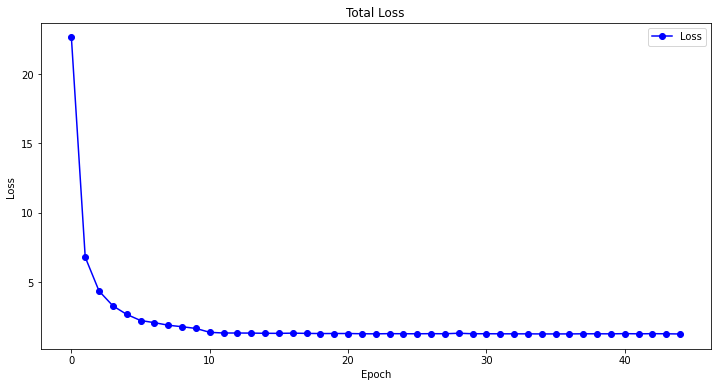

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), total_loss, 'bo-')
plt.legend(["Loss"], loc ="upper right")
plt.title('Total Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss ")
plt.show()

## Training Accracy VS Validation Accuracy Plot

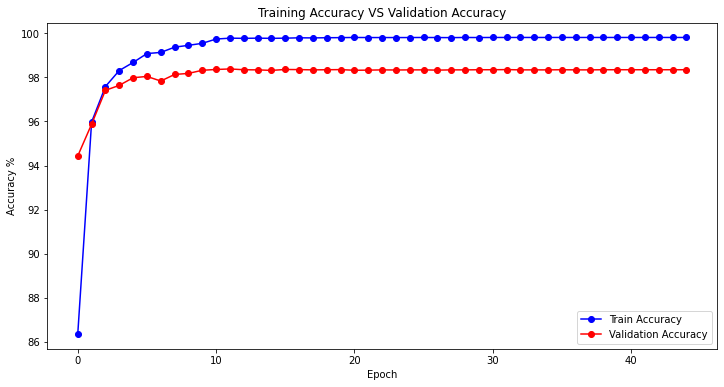

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), accuracies_train, 'bo-')
plt.plot(range(epochs), accuracies_validation, 'ro-')
plt.legend(["Train Accuracy", "Validation Accuracy"], loc ="lower right")
plt.title('Training Accuracy VS Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.show()

## Predictions

In [35]:
from evaluate import *

In [36]:
y_preds = predictions(model, test_loader, device)

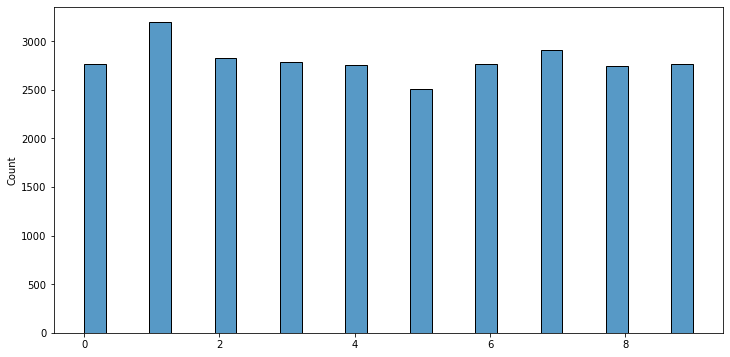

In [37]:
import seaborn as sns
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=y_preds)
plt.show()

## Save the Model

In [ ]:
 path = os.path.join(path, param_name)
    with open(path, 'wb') as file:
        torch.save({'model_state_dict': model.state_dict()}, file)
